In [2]:
from langgraph.graph import StateGraph,START,END
from typing import Annotated,TypedDict
from langchain_groq import ChatGroq
from dotenv import load_dotenv
from langgraph.checkpoint.memory import InMemorySaver
load_dotenv()
import os
groq_api=os.getenv("test_groq")

In [3]:
model=ChatGroq(
    api_key=groq_api,
    model_name="openai/gpt-oss-20b"
)

In [4]:
class JokeState(TypedDict):
    topic:str
    joke:str
    explaination:str

In [ ]:
def generate_joke(state:JokeState):
    
    prompt=f"generate a joke on the topic {state['topic']}"
    response=model.invoke(prompt).content
    return {'joke':response}

In [6]:
def generate_explaination(state:JokeState):
    
    prompt=f"write an explaination for the joke-> {state['joke']}"
    response=model.invoke(prompt).content
    return {'joke':response}

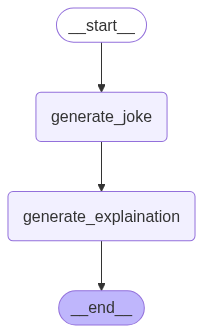

In [8]:
graph=StateGraph(JokeState)

graph.add_node('generate_joke',generate_joke)
graph.add_node('generate_explaination',generate_explaination)

graph.add_edge(START,'generate_joke')
graph.add_edge('generate_joke','generate_explaination')
graph.add_edge('generate_explaination',END)

checkpointer=InMemorySaver()

workflow=graph.compile(checkpointer=checkpointer)
workflow

In [10]:
config1={'configurable':{'thread_id':"1"}}
workflow.invoke({'topic':'hotdog'},config=config1)

{'topic': 'hotdog',
 'joke': '**Why the joke is funny – a quick “word‑play” breakdown**\n\n| Element | What it is | How it works |\n|--------|-----------|-------------|\n| **“hotdog”** | A classic sandwich made of a sausage (often called a *frankfurter*). | Sets up the literal subject of the joke – a hotdog is a food item that would never normally think about jobs. |\n| **“apply for a job”** | The usual phrase when someone is looking for work. | Gives the joke its narrative structure – we expect a person, but here it’s a food item. |\n| **“a little *frank* experience”** | “Frank” is slang for honest or straightforward, but it’s also the word that describes a particular type of sausage (a *frankfurter*). | The pun is two‑fold: 1) It sounds like “to get a little honest experience,” and 2) it literally refers to a “frank” (hotdog) gaining “experience.” |\n| **“earn some *bun* bucks”** | “Bun” refers to the bread roll that holds a hotdog, while “bucks” is slang for money. | The joke replac

In [11]:
workflow.get_state(config1)

StateSnapshot(values={'topic': 'hotdog', 'joke': '**Why the joke is funny – a quick “word‑play” breakdown**\n\n| Element | What it is | How it works |\n|--------|-----------|-------------|\n| **“hotdog”** | A classic sandwich made of a sausage (often called a *frankfurter*). | Sets up the literal subject of the joke – a hotdog is a food item that would never normally think about jobs. |\n| **“apply for a job”** | The usual phrase when someone is looking for work. | Gives the joke its narrative structure – we expect a person, but here it’s a food item. |\n| **“a little *frank* experience”** | “Frank” is slang for honest or straightforward, but it’s also the word that describes a particular type of sausage (a *frankfurter*). | The pun is two‑fold: 1) It sounds like “to get a little honest experience,” and 2) it literally refers to a “frank” (hotdog) gaining “experience.” |\n| **“earn some *bun* bucks”** | “Bun” refers to the bread roll that holds a hotdog, while “bucks” is slang for mone

In [12]:
list(workflow.get_state_history(config1))

[StateSnapshot(values={'topic': 'hotdog', 'joke': '**Why the joke is funny – a quick “word‑play” breakdown**\n\n| Element | What it is | How it works |\n|--------|-----------|-------------|\n| **“hotdog”** | A classic sandwich made of a sausage (often called a *frankfurter*). | Sets up the literal subject of the joke – a hotdog is a food item that would never normally think about jobs. |\n| **“apply for a job”** | The usual phrase when someone is looking for work. | Gives the joke its narrative structure – we expect a person, but here it’s a food item. |\n| **“a little *frank* experience”** | “Frank” is slang for honest or straightforward, but it’s also the word that describes a particular type of sausage (a *frankfurter*). | The pun is two‑fold: 1) It sounds like “to get a little honest experience,” and 2) it literally refers to a “frank” (hotdog) gaining “experience.” |\n| **“earn some *bun* bucks”** | “Bun” refers to the bread roll that holds a hotdog, while “bucks” is slang for mon

In [13]:
config2={'configurable':{'thread_id':"1"}}
workflow.invoke({'topic':'Chai'},config=config2)

{'topic': 'Chai',
 'joke': '**Why the joke is funny – a quick breakdown**\n\n| Part of the joke | What it means | Why it’s humorous |\n|------------------|---------------|------------------|\n| **“Why did the chai go to school?”** | *Chai* is a type of tea (especially a spiced tea from India). | It anthropomorphises the tea, giving it a human‑like motive (“going to school”), which immediately signals a joke. |\n| **“Because it wanted to get a little *brew*ed education!”** | *Brewed* is a verb that means “to prepare tea or coffee by steeping.” The word *brew* also sounds like “brood” (to grow or develop). | The punchline is a **play on words**. The phrase “a little brewed education” can be read in two ways: 1) *a little brewed* (i.e., a small amount of brewed tea) **and** 2) *a little brewed education* (i.e., a modest education). The joke hinges on the double‑meaning of *brew*—it’s literally tea being “bred” (or brewed) and figuratively “bred” (educated). |\n\n### How the pun works\n\n1

In [15]:
workflow.get_state(config2)

StateSnapshot(values={'topic': 'Chai', 'joke': '**Why the joke is funny – a quick breakdown**\n\n| Part of the joke | What it means | Why it’s humorous |\n|------------------|---------------|------------------|\n| **“Why did the chai go to school?”** | *Chai* is a type of tea (especially a spiced tea from India). | It anthropomorphises the tea, giving it a human‑like motive (“going to school”), which immediately signals a joke. |\n| **“Because it wanted to get a little *brew*ed education!”** | *Brewed* is a verb that means “to prepare tea or coffee by steeping.” The word *brew* also sounds like “brood” (to grow or develop). | The punchline is a **play on words**. The phrase “a little brewed education” can be read in two ways: 1) *a little brewed* (i.e., a small amount of brewed tea) **and** 2) *a little brewed education* (i.e., a modest education). The joke hinges on the double‑meaning of *brew*—it’s literally tea being “bred” (or brewed) and figuratively “bred” (educated). |\n\n### Ho

In [ ]:
list(workflow.get_state_history(config2))

[StateSnapshot(values={'topic': 'Chai', 'joke': '**Why the joke is funny – a quick breakdown**\n\n| Part of the joke | What it means | Why it’s humorous |\n|------------------|---------------|------------------|\n| **“Why did the chai go to school?”** | *Chai* is a type of tea (especially a spiced tea from India). | It anthropomorphises the tea, giving it a human‑like motive (“going to school”), which immediately signals a joke. |\n| **“Because it wanted to get a little *brew*ed education!”** | *Brewed* is a verb that means “to prepare tea or coffee by steeping.” The word *brew* also sounds like “brood” (to grow or develop). | The punchline is a **play on words**. The phrase “a little brewed education” can be read in two ways: 1) *a little brewed* (i.e., a small amount of brewed tea) **and** 2) *a little brewed education* (i.e., a modest education). The joke hinges on the double‑meaning of *brew*—it’s literally tea being “bred” (or brewed) and figuratively “bred” (educated). |\n\n### H